Analysis of AB interaction with memory

In [36]:
#set up the environment
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from os import walk,getcwd
import matplotlib.pyplot as plt
#custom helper functions for reading in data files and performing key analysis steps
%run AB_mem_helper_funcs.py
curwd = getcwd()
mypath = "data"
pd.options.mode.chained_assignment = None  # default='warn'

In [37]:
#find the data file paths
dataFiles = list(walk(mypath))[0][2]
dataFiles = Series([curwd + '\\' + mypath +'\\'+ file for file in dataFiles])


In [38]:
test = readDataFile(dataFiles[4])

In [39]:
#find all the relevant summary stats for each data file
allDat = dataFiles.map(readDataFile)

In [40]:
#aggregate the summaries into a dataframe
df = DataFrame()
for row in allDat: 
    df = df.add(DataFrame(row), fill_value = 0)
df = df.T

In [41]:
df

,Lag1_T1A_T2A_T1,Lag1_T1A_T2A_T2,Lag1_T1A_T2A_T2_T1,Lag1_T1A_T2P_T1,Lag1_T1A_T2P_T2,Lag1_T1A_T2P_T2_T1,Lag1_T1P_T2A_T1,Lag1_T1P_T2A_T2,Lag1_T1P_T2A_T2_T1,Lag1_T1P_T2P_T1,...,Lag5_T1P_T2P_T2_T1,PP1T2_mem,PP1blink_mem,PP1cor_mem,PP1miss_mem,PP5cor_mem,distMem,distracter_mem,novel_mem,targMem
2022-06-28_15h27.56.947,1.0,1.0,1.000000,1.000000,0.678571,0.678571,0.857143,0.892857,0.875000,0.816092,...,0.888889,0.100000,0.625000,0.622222,0.000000,0.593750,0.780591,0.403846,0.886486,0.754153
2022-06-28_16h39.33.399,1.0,1.0,1.000000,0.964286,0.678571,0.703704,0.857143,0.928571,0.916667,0.965517,...,0.858974,0.000000,0.688889,0.513514,NaN,0.648649,0.852321,0.634615,0.913514,0.794118
2022-06-29_09h00.40.945,0.8,0.6,0.500000,0.714286,0.892857,0.850000,0.750000,0.357143,0.285714,0.896552,...,0.949367,0.428571,0.800000,0.671429,0.500000,0.465116,0.827004,0.903846,0.805405,0.717949
2022-06-29_10h01.10.225,0.9,1.0,1.000000,1.000000,0.500000,0.500000,0.821429,0.928571,0.913043,0.908046,...,0.647887,0.750000,0.777778,0.720000,0.000000,0.714286,0.810127,0.461538,0.908108,0.835017
2022-06-29_10h58.31.945,1.0,0.9,0.900000,0.964286,0.928571,0.925926,0.892857,0.821429,0.800000,0.919540,...,0.850000,0.200000,0.428571,0.338028,0.000000,0.444444,0.852321,0.480769,0.956757,0.724590
2022-06-29_12h25.08.771,0.9,1.0,1.000000,0.892857,0.750000,0.760000,0.750000,0.892857,0.904762,0.839080,...,0.933333,0.500000,0.724138,0.761905,0.333333,0.871795,0.738397,0.788462,0.724324,0.737013
2022-06-29_13h55.44.897,0.9,0.4,0.444444,0.964286,0.857143,0.851852,0.785714,0.571429,0.636364,0.908046,...,0.869565,0.333333,0.640000,0.596154,0.000000,0.593750,0.763713,0.365385,0.875676,0.764120
2022-06-29_16h26.54.527,0.9,0.8,0.777778,0.928571,0.571429,0.576923,0.678571,0.857143,0.842105,0.850575,...,0.650794,0.444444,0.756098,0.562500,0.000000,0.545455,0.835443,0.596154,0.902703,0.797251


In [42]:
df['blinkMag'] = df['Lag5_T1P_T2P_T2_T1'] - df['Lag1_T1P_T2P_T2_T1']

(array([1., 2., 0., 0., 0., 2., 1., 0., 1., 1.]),
 array([-0.0625    , -0.01559066,  0.03131868,  0.07822802,  0.12513736,
         0.1720467 ,  0.21895604,  0.26586538,  0.31277473,  0.35968407,
         0.40659341]),
 <a list of 10 Patch objects>)

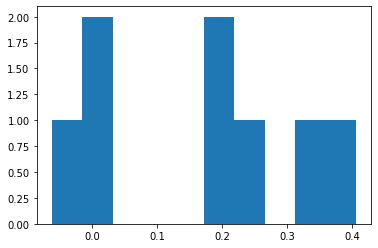

In [43]:
#how big is the attentional blink we observe? 
plt.hist(df['blinkMag'])

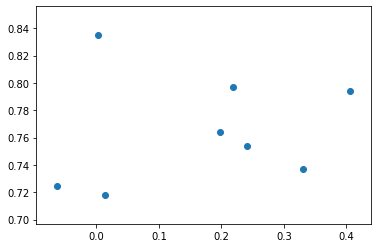

In [44]:
#does a bigger attentional blink (worse performance) lead to better memory on a subject level? 
plt.scatter(df['blinkMag'], df['targMem'])

(array([1., 1., 0., 1., 1., 1., 0., 1., 0., 2.]),
 array([-0.03776683, -0.01463039,  0.00850605,  0.03164249,  0.05477893,
         0.07791537,  0.1010518 ,  0.12418824,  0.14732468,  0.17046112,
         0.19359756]),
 <a list of 10 Patch objects>)

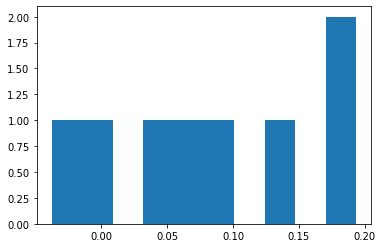

In [45]:
#does spending more time (and causing an attentional blink) on T1 lead to better memory on an item level? 
plt.hist(df['PP1blink_mem'] - df['PP1cor_mem'])